In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
path = 'tate_data/'
df_artists = pd.read_csv(path+'artist_data.csv')
df_artwork = pd.read_csv(path+'artwork_data.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


My objective here is to copy the questions from the walk-through and use the thinkful materials as an answer key rather than source. This was not strictly successful but improved over time.

## 1 Who are the most popular artists in the Tate Collection? Are there any outliers in terms of amount collected?

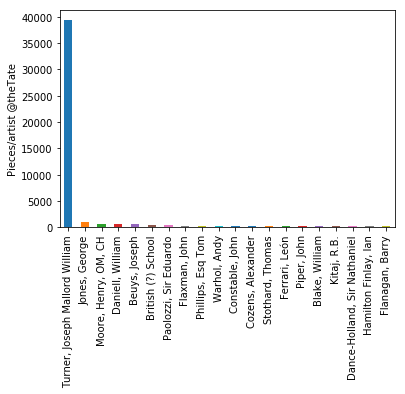

In [33]:
df_artwork.artist.value_counts().head(20).plot('bar')
plt.ylabel('Pieces/artist @theTate')

Suppose we want to see a distribution without William Turner The Prolific...

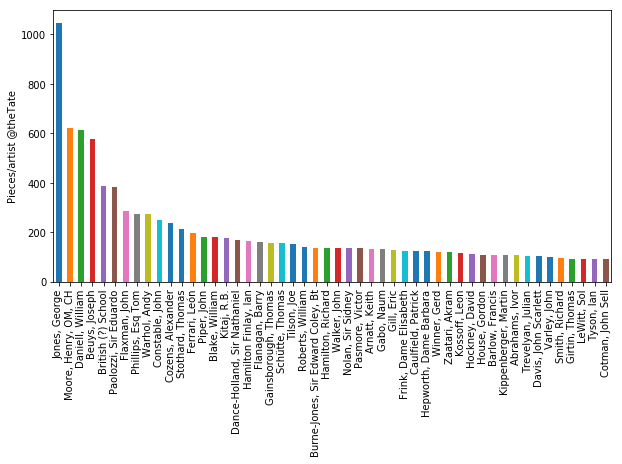

In [35]:
df_artwork.artist.value_counts()[1:51].plot('bar', figsize = (10, 5))
plt.ylabel('Pieces/artist @theTate')

In [ ]:
Not surprisingly, there are a lot of artists (1,446) who are only represented by one work.

In [32]:
from collections import Counter
counter = Counter(df_artwork.artist.value_counts())
counter[1]

1446

## 2 Who are the artists in the Tate collection? How does that vary by geography, age, and living or dead?

In [36]:
df_artists.columns

Index(['id', 'name', 'gender', 'dates', 'yearOfBirth', 'yearOfDeath',
       'placeOfBirth', 'placeOfDeath', 'url'],
      dtype='object')

In [61]:
places = df_artists.placeOfBirth.str.split(',', 1).tolist()
countries = [places[ik][-1].strip() for ik in range(len(places)) if type(places[ik]) != float]

In [83]:
c_countries = Counter(countries).most_common()

other = 0
for ik in range(19, len(c_countries)):
    other += c_countries[ik][1]
    
c_countries = c_countries[:9]
c_countries.append(('Other', other))

(-1.1103825270408494,
 1.1004944060495643,
 -1.1012710442592371,
 1.1105870679371377)

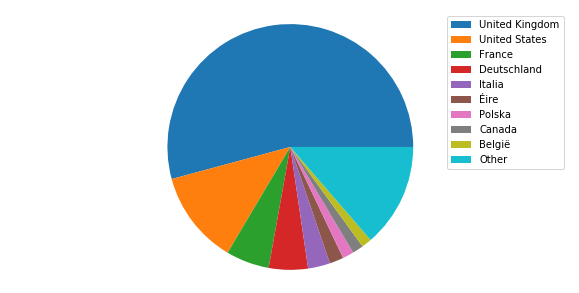

In [91]:
plt.figure(figsize = (10,5))
plt.pie([country[1] for country in c_countries], autopct=None)
plt.legend([country[0] for country in c_countries])
plt.axis('equal')

I object to making a line plot for artist date of birth because there is no meaning two the connection between the counts of one age.

<Container object of 411 artists>

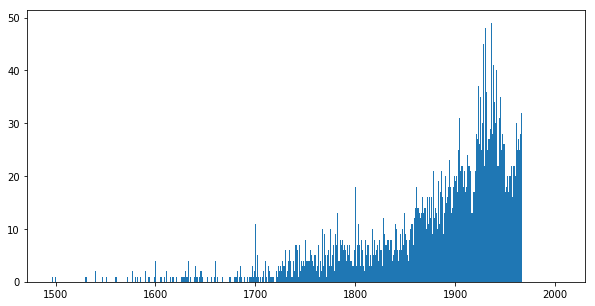

In [106]:
c = sorted(Counter(df_artists.yearOfBirth).most_common())
plt.figure(figsize = (10, 5))
plt.bar([c[ik][0] for ik in range(len(c))], [c[ik][1] for ik in range(len(c))])

In [101]:
df_artwork.acquisitionYear.value_counts()

(-1000, 40000)

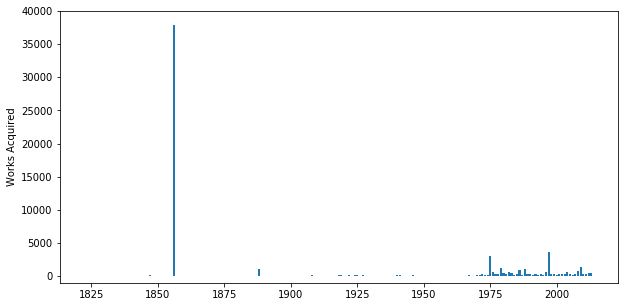

In [4]:
acquisition_df = pd.DataFrame(df_artwork.acquisitionYear.value_counts())
acquisition_df = acquisition_df.sort_index()
plt.figure(figsize = (10, 5))
plt.bar(acquisition_df.acquisitionYear.index, acquisition_df.acquisitionYear.values)
plt.ylabel('Works Acquired')
plt.ylim([-1000, 40000])

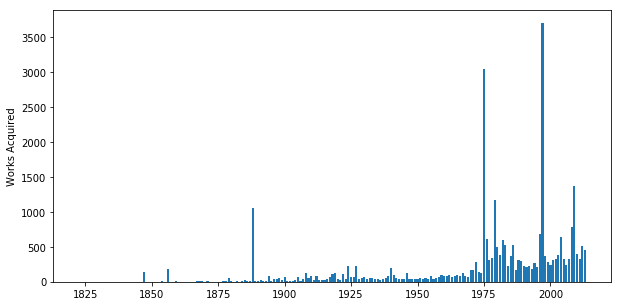

In [59]:
df_notTurner = df_artwork[df_artwork.artist != 'Turner, Joseph Mallord William']
df_acquisitions2 = df_notTurner.acquisitionYear.value_counts()
df_acquisitions2.sort_index()
plt.figure(figsize = (10,5))
plt.bar(df_acquisitions2.index, df_acquisitions2.values)
plt.ylabel('Works Acquired')

In [20]:
acquisition2_df.index

Float64Index([1823.0, 1824.0, 1826.0, 1827.0, 1828.0, 1830.0, 1834.0, 1835.0,
              1836.0, 1837.0,
              ...
              2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0,
              2012.0, 2013.0],
             dtype='float64', length=178)

([<matplotlib.axis.XTick at 0x1067b1198>,
 <a list of 2 Text xticklabel objects>)

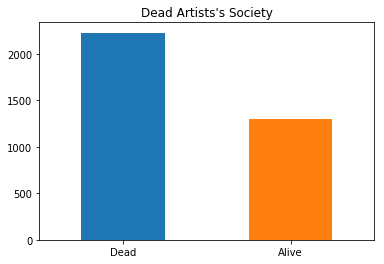

In [46]:
living = pd.DataFrame(df_artists.yearOfDeath.isnull())
living = living.yearOfDeath.value_counts()
living.plot(kind = 'bar', legend = False)
plt.title('Dead Artists\'s Society')
plt.xticks([0,1], ['Dead', 'Alive'], rotation=0)

## 3 What are the most popular mediums and how does medium affect size?

In [32]:
df_artwork.medium.value_counts().head(10)

Graphite on paper                            26167
Oil paint on canvas                           3383
Screenprint on paper                          2984
Lithograph on paper                           2721
Watercolour on paper                          1890
Etching on paper                              1793
Graphite and watercolour on paper             1680
Ink on paper                                   880
Intaglio print on paper                        820
Photograph, gelatin silver print on paper      750
Name: medium, dtype: int64